In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ddfUtils import *
from ddfRoot import *
from sndUtils import *
from mplStyling import *
import uproot

plt.style.use("ddf-pub")

Welcome to JupyROOT 6.28/12


In [2]:
runs = [7080, 10241]

In [3]:
chiArrs = pd.DataFrame({
    "chi1":  [2.5, 3.5, 4.5,  4.75,  5.0, 5.25,  5.75, 7.5,  10.0, 15.0, 20.0, 30.0,  40.0 ],
    "chi11": [2.0, 2.5, 2.75, 2.875, 3.0, 3.125, 3.5,  4.0,  5.0,  7.5,  10.0, 15.0,  20.0 ],
    "chi3":  [2.5, 3.0, 4.5,  4.75,  5.0, 5.25,  7.5,  10.0, 15.0, 30.0, 50.0, 80.0,  120.0],
    "chi13": [5.0, 6.5, 7,    7.25,  7.5, 7.75,  8.5,  10.0, 25.0, 50.0, 80.0, 125.0, 250.0]
})

# chiArrs = pd.read_csv("/afs/cern.ch/work/i/idioniso/sndMuonFlux/trkeff/chi2ndfVals.csv", sep=" ", header=None, names=["chi1", "chi11", "chi3", "chi13"])

chiArrs

,chi1,chi11,chi3,chi13
0,2.50,2.000,2.50,5.00
1,3.50,2.500,3.00,6.50
2,4.50,2.750,4.50,7.00
3,4.75,2.875,4.75,7.25
4,5.00,3.000,5.00,7.50
5,5.25,3.125,5.25,7.75
6,5.75,3.500,7.50,8.50
7,7.50,4.000,10.00,10.00
8,10.00,5.000,15.00,25.00
9,15.00,7.500,30.00,50.00


In [4]:
# 2.5 2.0 2.5 5.0
# 3.5 2.5 3.0 6.5
# 4.5 2.75 4.5 7
# 4.75 2.875 4.75 7.25
# 5.0 3.0 5.0 7.5
# 5.25 3.125 5.25 7.75
# 5.75 3.5 7.5 8.5
# 7.5 4.0 10.0 10.0
# 10.0 5.0 15.0 25.0
# 15.0 7.5 30.0 50.0
# 20.0 10.0 50.0 80.0
# 30.0 15.0 80.0 125.0
# 40.0 20.0 120.0 250.0


In [5]:
trkeff = {}
for run in runs: 
    trkeff[run] = {}
    
    for tt in (1, 11, 3, 13):
        trkeff[run][f"eff{tt}"] = []
        trkeff[run][f"effErr{tt}"] = []

In [6]:
for i_run, run in enumerate(runs):
    for ii, i in enumerate(chiArrs.index):
        chi1  = chiArrs.at[i, f"chi1"]
        chi11 = chiArrs.at[i, f"chi11"]
        chi3  = chiArrs.at[i, f"chi3"]
        chi13 = chiArrs.at[i, f"chi13"]

        # if chi1>5: break
        for i_tt, tt in enumerate((1, 11, 3, 13)):
            # print(ii*4+i_tt)
            
            rootFile = uproot.open(f"/eos/user/i/idioniso/mfout/trkeff/trkeff-chi2ndfMax/run_{run:06d}/trkeff_Run{run}_tc_tag80-noCandRestr_chi-{chi1:g}-{chi11:g}-{chi3:g}-{chi13:g}.root")
            # rootFile = uproot.open(f"/home/idioniso/tmp/trkeff-chi2ndf/restr/trkeff-{chi}_{run}_tc.root")

            eff    = rootFile[f"eff_{tt}_data.tc"].arrays()["eff"][0]
            effErr = rootFile[f"eff_{tt}_data.tc"].arrays()["effErr"][0]

            trkeff[run][f"eff{tt}"].append(eff)
            trkeff[run][f"effErr{tt}"].append(effErr)

    trkeff[run] = pd.DataFrame(trkeff[run])

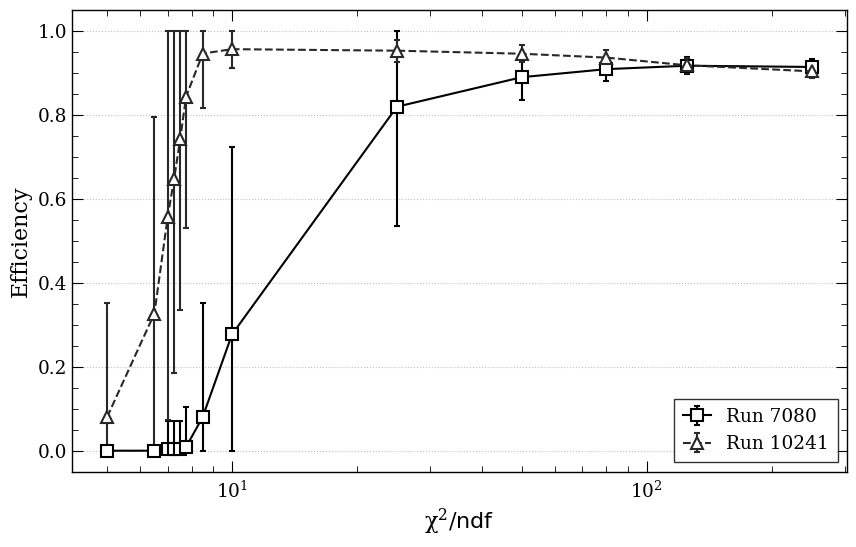

In [14]:
TT = 13

TTMax = {
    7080:  {1: 0.882, 11: 0.937, 3: 0.875, 13: 0.890},
    10241: {1: 0.821, 11: 0.921, 3: 0.896, 13: 0.913}
}


plt.figure(figsize=(10, 6))
for run in runs:
    # x = chiArrs[f"chi{TT}"]
    
    y = trkeff[run][f"eff{TT}"]
    x = chiArrs[f"chi{TT}"][:len(y)]

    yerr = trkeff[run][f"effErr{TT}"]

    # Clip upper and lower errors to keep y ± yerr within [0, 1]
    lower = np.minimum(yerr, y)              # y - err ≥ 0
    upper = np.minimum(yerr, 1 - y)          # y + err ≤ 1

    plt.errorbar(x, y, yerr=[lower, upper], label=f"Run {run}",
                 capsize=2)
    # plt.axhline(TTMax[run][TT], color="black", linestyle=":", label=f"Max. $\chi^2/ndf$ Run {run} ({TTMax[run][TT]:.3f})")

plt.xlabel(r"$\chi^2/\mathrm{ndf}$")
plt.xscale("log")
# plt.xlim(10, 30)
plt.ylabel("Efficiency")
plt.grid(axis="y")
plt.legend()
plt.show()

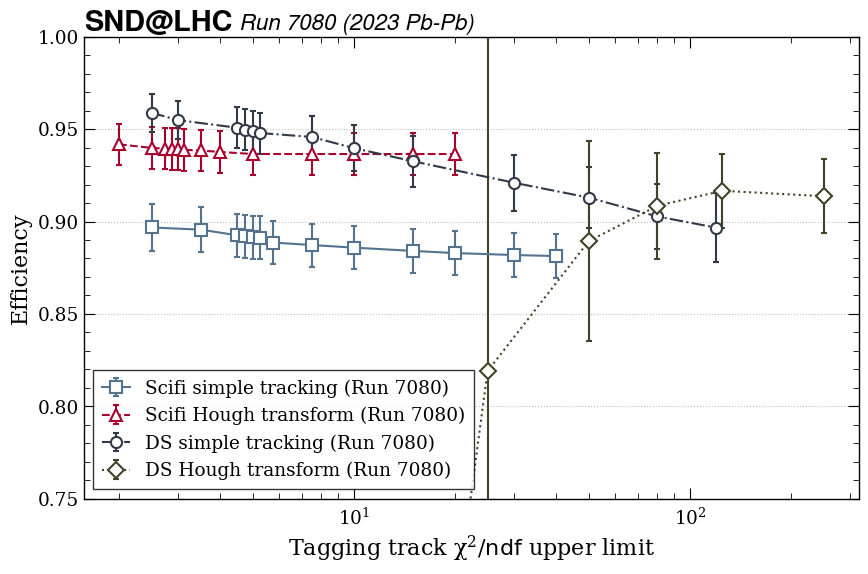

In [ ]:
RUN = 7080

TTs = (1, 11, 3, 13)

plt.figure(figsize=(10, 6))
for tt, tt_color in zip(TTs, ["#54738e", "#a9002d", "#333a47", "#424229"]):
    x = chiArrs[f"chi{tt}"]
    y = trkeff[RUN][f"eff{tt}"]
    yerr = trkeff[RUN][f"effErr{tt}"]

    lower = np.minimum(yerr, y)
    upper = np.minimum(yerr, 1 - y)

    plt.errorbar(x, y, yerr=[lower, upper], label=f"{system(tt)} {algorithm(tt)} (Run {RUN})", capsize=2, color=tt_color)


plt.xlabel(r"Tagging track $\chi^2/\mathrm{ndf}$ upper limit")
plt.xscale("log")
# plt.xlim(10, 30)
plt.ylim(0.75, 1)
plt.ylabel("Efficiency")
addMplLabel(mainText="SND@LHC", extraText=f"Run 7080 (2023 Pb-Pb)", loc=0)
plt.grid()
plt.legend()
plt.show()

In [9]:
trkeff[7080][["eff1", "eff3"]]

,eff1,eff3
0,0.896788,0.958851
1,0.895599,0.954850
2,0.892546,0.950728
3,0.891992,0.949776
4,0.891425,0.948750
5,0.891126,0.947879
6,0.888618,0.945761
7,0.887267,0.939707
8,0.885864,0.932612
9,0.884086,0.920959


In [10]:
chiArrs[["chi3", "chi1"]]

,chi3,chi1
0,2.50,2.50
1,3.00,3.50
2,4.50,4.50
3,4.75,4.75
4,5.00,5.00
5,5.25,5.25
6,7.50,5.75
7,10.00,7.50
8,15.00,10.00
9,30.00,15.00
